In [1]:
import numpy as np
import librosa.display
import os
import sys
sys.path.append(os.path.abspath('../'))
from transforms import *
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from functools import partial

def tensor_to_img(spectrogram):
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(spectrogram, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.tight_layout()
    
def normalize(spec, mean, std):
    tensor = spec.copy()
    tensor -= mean
    tensor /= std
    return tensor

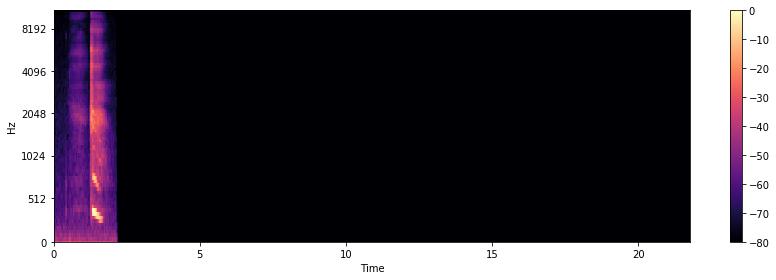

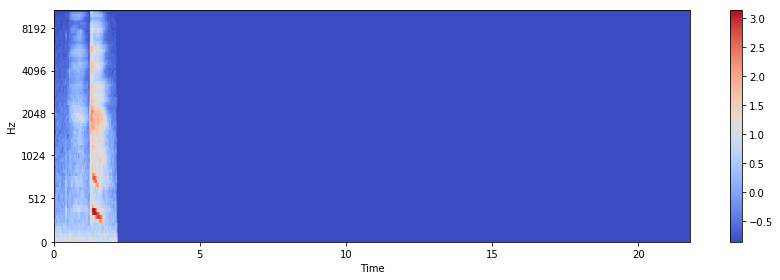

In [2]:
spec = np.load('eaf22f77.npy')
normalized_spec = normalize(spec, -62.893, 20.064)

tensor_to_img(spec)
tensor_to_img(normalized_spec)

/Users/vigi99/AirtelDEV/MixMatch-pytorch/transforms/spec_augment_utils.py:424: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor((queries - floor), dtype=grid_type, device=grid_device)


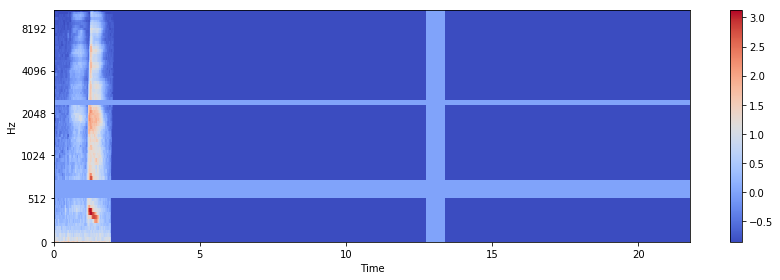

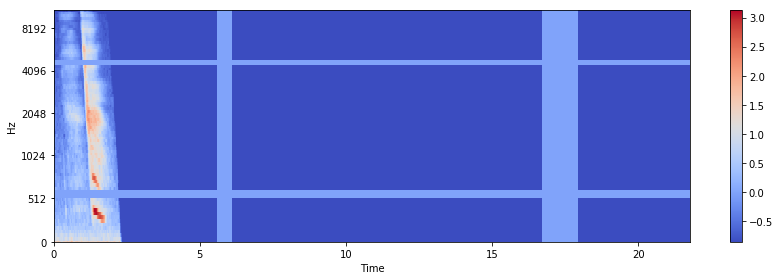

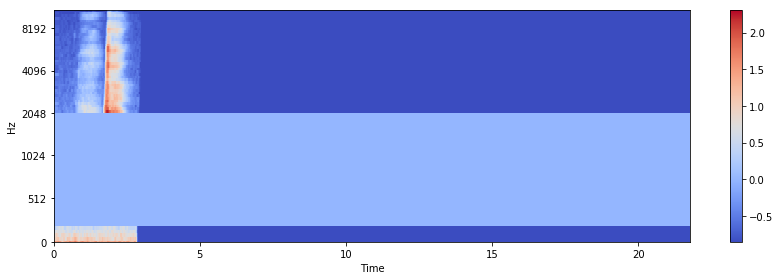

In [3]:
specaug_1 = partial(specaug, W=5, F=30, T=40, num_freq_masks=2, num_time_masks=2, replace_with_zero=True)
specaug_2 = partial(specaug, W=10, F=15, T=70, num_freq_masks=2, num_time_masks=2, replace_with_zero=True)
specaug_3 = partial(specaug, W=5, F=27, T=10, num_freq_masks=2, num_time_masks=2, replace_with_zero=True)

spec_tensor = torch.from_numpy(normalized_spec.astype(np.float32)).permute(1,0)

augment_spec1 = specaug_1(spec_tensor).permute(1,0)
augment_spec2 = specaug_2(spec_tensor).permute(1,0)
augment_spec3 = specaug_3(spec_tensor).permute(1,0)
tensor_to_img(augment_spec1.cpu().numpy())
tensor_to_img(augment_spec2.cpu().numpy())
tensor_to_img(augment_spec3.cpu().numpy())

In [37]:
spec_tensor.mean()

tensor(-0.7474)